# I] Import functions and options

In [1]:
import pandas, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':10, 'figure.figsize':(12, 8)})

from matplotlib_venn import venn2

In [3]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'

In [4]:
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] Data download

In [26]:
%%time
# DL data gene expression for Normal Tissue and Primary Tumors
path = output_file_directory + "/ATG7/dataframes_for_input/"
ensembl_normal_atg7_proteinGE = pandas.read_csv(path+"ensembl_normal_atg7_proteinGE.tsv", sep = "\t")
ensembl_primary_atg7_proteinGE = pandas.read_csv(path+"ensembl_primary_atg7_proteinGE.tsv", sep = "\t")

print(ensembl_normal_atg7_proteinGE.shape)
print(ensembl_primary_atg7_proteinGE.shape)
ensembl_normal_atg7_proteinGE.head(2)

(7429, 19387)
(9185, 19387)
Wall time: 3min 36s


,Sample_Type,Primary_Site,ATG7,ATG7_1,ATG7_2,ENSG00000198888,ENSG00000198763,ENSG00000198804,ENSG00000198712,ENSG00000228253,...,ENSG00000160678,ENSG00000160679,ENSG00000143553,ENSG00000214193,ENSG00000196182,ENSG00000181817,ENSG00000116885,ENSG00000116898,ENSG00000119535,ENSG00000142694
0,Normal Tissue,Muscle,5.042,3.860,2.390,14.0639,13.9595,13.8503,14.4453,15.0971,...,2.7868,5.6494,5.0193,2.694,4.5274,5.0998,2.3423,6.0790,6.4861,4.9700
1,Normal Tissue,Muscle,4.252,2.322,1.956,13.9265,13.5455,15.2642,14.3855,15.1867,...,9.3501,6.1104,6.0570,1.177,6.8792,6.4325,2.1013,6.7035,1.1706,1.3167


In [8]:
%%time
#download the protein coding list. will be useful with correlation results.
path = input_file_directory + "protein_coding_list.txt"
protein_coding_list= pandas.read_csv(path, sep = "\t")
print(protein_coding_list.shape)
protein_coding_list.head()

(22796, 4)
Wall time: 25 ms


,ensembl_gene_id,hgnc_symbol,entrezgene_id,transcript_biotype
1,ENSG00000198888,MT-ND1,4535.0,protein_coding
2,ENSG00000198763,MT-ND2,4536.0,protein_coding
3,ENSG00000198804,MT-CO1,4512.0,protein_coding
4,ENSG00000198712,MT-CO2,4513.0,protein_coding
5,ENSG00000228253,MT-ATP8,4509.0,protein_coding


# III] HK2 Expression 

In [29]:
ensembl_normal_atg7_proteinGE.head()

,Sample_Type,Primary_Site,ATG7,ATG7_1,ATG7_2,ENSG00000198888,ENSG00000198763,ENSG00000198804,ENSG00000198712,ENSG00000228253,...,ENSG00000160678,ENSG00000160679,ENSG00000143553,ENSG00000214193,ENSG00000196182,ENSG00000181817,ENSG00000116885,ENSG00000116898,ENSG00000119535,ENSG00000142694
0,Normal Tissue,Muscle,5.042,3.860,2.390,14.0639,13.9595,13.8503,14.4453,15.0971,...,2.7868,5.6494,5.0193,2.6940,4.5274,5.0998,2.3423,6.0790,6.4861,4.9700
1,Normal Tissue,Muscle,4.252,2.322,1.956,13.9265,13.5455,15.2642,14.3855,15.1867,...,9.3501,6.1104,6.0570,1.1770,6.8792,6.4325,2.1013,6.7035,1.1706,1.3167
2,Normal Tissue,Muscle,3.909,2.602,1.345,14.2878,14.1511,14.3722,13.8211,14.8161,...,9.0646,5.9750,5.1173,1.8683,4.6136,5.0090,2.0604,5.7848,1.7489,4.6514
3,Normal Tissue,Muscle,3.854,2.568,1.428,13.8853,14.2716,15.1167,14.0622,15.5897,...,9.2252,5.4941,5.5880,-0.4521,5.6631,6.3797,2.5683,7.3214,1.6140,1.5563
4,Normal Tissue,Muscle,3.822,2.164,1.293,12.9986,13.7570,14.4661,13.4082,14.0564,...,8.9779,6.1502,5.1330,2.0289,6.8202,6.1789,1.8524,6.7685,2.8838,1.8323


In [46]:
#because ATG7(2) expression is correlated with HK2 in Normal Tissue 
#and we know HK2 is not expressed in all tissue. Where HK2 is expressed ?

      Primary_Site  ATG7(total)   ATG7(1)   ATG7(2)        HK2
26          Testis    22.559422  9.606273  3.520579  35.903950
15          Muscle     6.394430  2.361606  1.179131  21.102146
0   Adipose Tissue    13.205544  6.711094  1.538953  20.953111
3            Blood    13.524349  2.856719  3.904353  19.003701
8            Colon     9.507805  5.548414  0.830093  17.250307


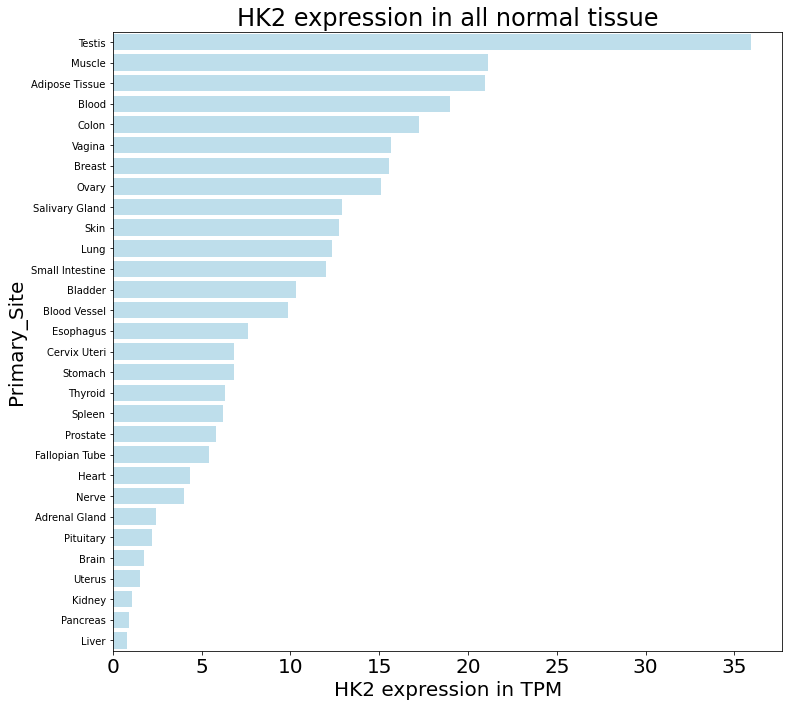

            Primary_Site  ATG7(total)   ATG7(1)   ATG7(2)        HK2
10  Head And Neck Region    14.523102  5.530002  3.438664  42.414856
8              Esophagus    14.947511  5.657722  3.145191  39.530130
6                  Colon    14.273716  5.547910  3.038977  35.624687
20                Rectum    14.132734  5.812341  2.999638  33.519051
14                  Lung    15.212185  5.684523  3.269985  32.241548


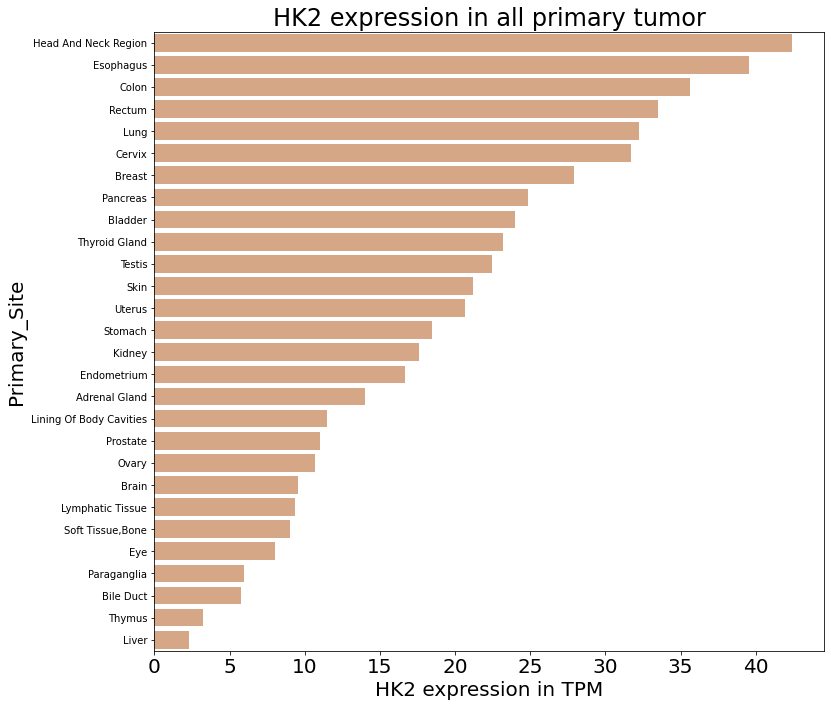

<Figure size 864x576 with 0 Axes>

In [47]:
dfs = [[ensembl_normal_atg7_proteinGE, 'normal tissue', 'skyblue'], 
       [ensembl_primary_atg7_proteinGE, 'primary tumor', 'chocolate']]
for df in dfs:
    HK2_express = df[0][['Primary_Site', 'ATG7', 'ATG7_1', 'ATG7_2', 'ENSG00000159399']]
    HK2_express = HK2_express.dropna(axis=0)
    HK2_express["ATG7(total)"] = pow(2,HK2_express['ATG7'])-0.001
    HK2_express["ATG7(1)"] = pow(2,HK2_express['ATG7_1'])-0.001
    HK2_express["ATG7(2)"] = pow(2,HK2_express['ATG7_2'])-0.001
    HK2_express["HK2"] = pow(2,HK2_express['ENSG00000159399'])-0.001

    HK2_express= HK2_express[['Primary_Site', 'ATG7(total)', 'ATG7(1)', 'ATG7(2)', 'HK2']]
    HK2_express['ATG7(2)'] = HK2_express['ATG7(2)'].abs()
    HK2_express= HK2_express.groupby('Primary_Site').agg(numpy.mean)
    HK2_express = HK2_express.reset_index()
    HK2_express = HK2_express.sort_values(['HK2'], ascending = False)
    print(HK2_express.head())
    
    # Seaborn
    seaborn.barplot(data = HK2_express, x =  'HK2', y = 'Primary_Site', color = df[2], alpha=0.6)
    # seaborn.barplot(data = HK2_express, x =  'ATG7(total)', y = 'Primary_Site', color = 'orange', alpha=0.6)
    plt.title('HK2 expression in all ' + df[1])
    plt.xlabel('HK2 expression in TPM')
    plt.subplots_adjust(top=1.2)
    plt.show()
    plt.clf()